In [1]:
# Step 1: Install & Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Step 2: Load the Dataset
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

# Step 3: Explore the Data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


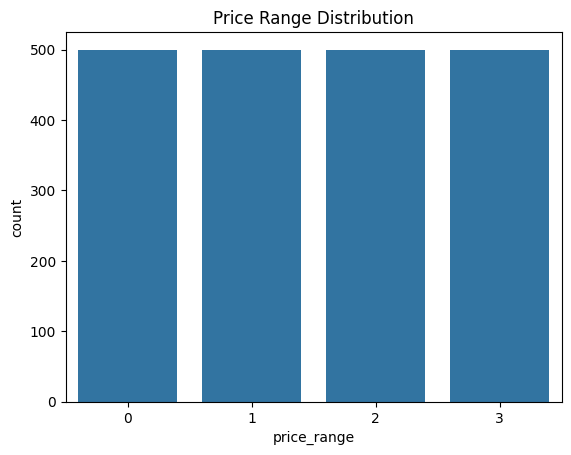

In [4]:
# Check for missing values
print(df.isnull().sum())

# Check class balance
sns.countplot(x='price_range', data=df)
plt.title("Price Range Distribution")
plt.show()

In [5]:
# Separate features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Feature Scaling (Important for k-NN & Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



In [8]:
#Random Forest Tree
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8925
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [9]:
#k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

print("k-NN Accuracy:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

k-NN Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       105
           1       0.34      0.45      0.39        91
           2       0.35      0.37      0.36        92
           3       0.81      0.54      0.65       112

    accuracy                           0.53       400
   macro avg       0.55      0.52      0.53       400
weighted avg       0.57      0.53      0.54       400



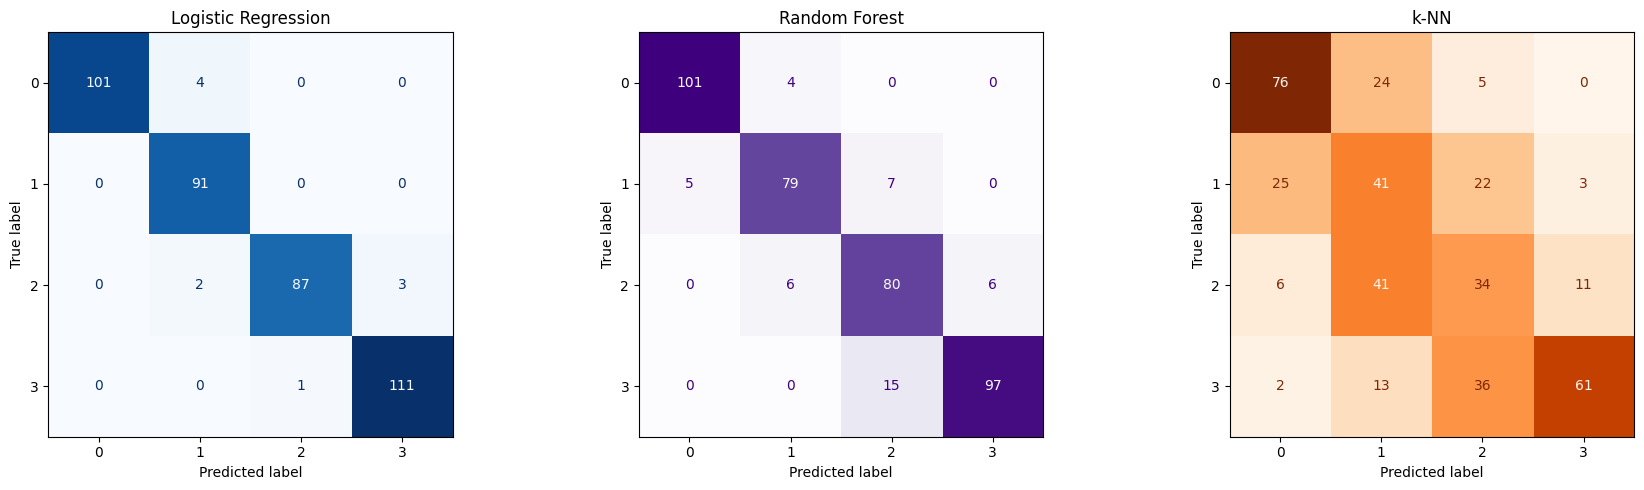

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
lr_pred_test = log_model.predict(X_test_scaled)
rf_pred_test = rf_model.predict(X_test)
knn_pred_test = knn_model.predict(X_test_scaled)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(
    y_test, lr_pred_test, ax=axes[0], cmap='Blues', colorbar=False
)
axes[0].set_title("Logistic Regression")

# Random Forest
ConfusionMatrixDisplay.from_predictions(
    y_test, rf_pred_test, ax=axes[1], cmap='Purples', colorbar=False
)
axes[1].set_title("Random Forest")

# k-NN
ConfusionMatrixDisplay.from_predictions(
    y_test, knn_pred_test, ax=axes[2], cmap='Oranges', colorbar=False
)
axes[2].set_title("k-NN")

plt.tight_layout()
plt.show()

In [11]:
#Make Predictions for a New Mobile Device

# Example input values
new_mobile = {
    'battery_power': 1200,
    'blue': 1,
    'clock_speed': 1.8,
    'dual_sim': 1,
    'fc': 2,
    'four_g': 1,
    'int_memory': 16,
    'm_dep': 0.5,
    'mobile_wt': 140,
    'n_cores': 4,
    'pc': 8,
    'px_height': 600,
    'px_width': 1000,
    'ram': 2048,
    'sc_h': 12,
    'sc_w': 7,
    'talk_time': 10,
    'three_g': 1,
    'touch_screen': 1,
    'wifi': 1
}

# Convert to DataFrame
input_df = pd.DataFrame([new_mobile])

# Scale input for models that need it
input_scaled = scaler.transform(input_df)

# Predict using trained models
lr_pred = log_model.predict(input_scaled)[0]         # Logistic Regression
rf_pred = rf_model.predict(input_df)[0]              # Random Forest
knn_pred = knn_model.predict(input_scaled)[0]        # k-NN

# Map numeric prediction to category name
price_map = {
    0: 'Low Cost',
    1: 'Medium Cost',
    2: 'High Cost',
    3: 'Very High Cost'
}

# Display results
print("\n🔮 Predicted Price Categories:")
print("Logistic Regression:", price_map[lr_pred])
print("Random Forest:", price_map[rf_pred])
print("k-NN:", price_map[knn_pred])


🔮 Predicted Price Categories:
Logistic Regression: Medium Cost
Random Forest: Medium Cost
k-NN: Low Cost


In [12]:
# Confirm we trained on all features from train.csv
feature_cols = list(X.columns)
print(f"Total features available (should be 20): {len(feature_cols)}")
print(feature_cols)

Total features available (should be 20): 20
['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


## 1) Random Forest impurity-based importance

Top features by impurity importance:
          feature  importance
0             ram    0.470962
1   battery_power    0.074796
2       px_height    0.058538
3        px_width    0.056722
4       mobile_wt    0.041434
5      int_memory    0.037928
6       talk_time    0.032441
7              pc    0.030745
8     clock_speed    0.029058
9            sc_h    0.028447
10           sc_w    0.028134
11             fc    0.024514
12          m_dep    0.024134
13        n_cores    0.023978
14        three_g    0.006841


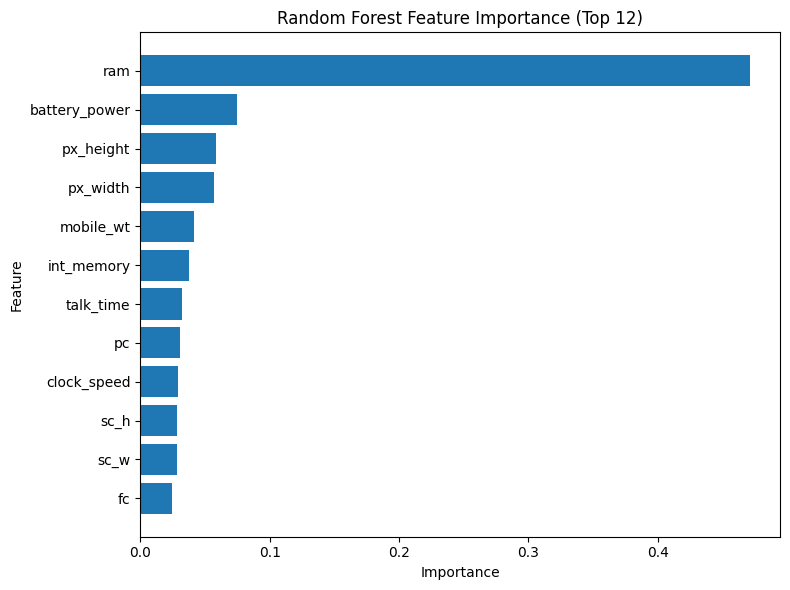

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

importances = getattr(rf_model, "feature_importances_", None)
if importances is None:
    raise RuntimeError("rf_model must be trained before running this cell.")

fi_df = pd.DataFrame({
    "feature": feature_cols,
    "importance": importances
}).sort_values("importance", ascending=False).reset_index(drop=True)

print("Top features by impurity importance:")
print(fi_df.head(15))

top_n = 12
plt.figure(figsize=(8, 6))
plt.barh(fi_df.head(top_n)["feature"][::-1], fi_df.head(top_n)["importance"][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance (Top 12)")
plt.tight_layout()
plt.show()

## 2) Permutation importance on test set (robust Top‑15)

Top‑15 by permutation importance:
          feature  importance_mean  importance_std
0             ram          0.62275        0.014935
1   battery_power          0.12225        0.012572
2        px_width          0.06575        0.009750
3       px_height          0.05450        0.010173
4    touch_screen          0.00725        0.002839
5              fc          0.00550        0.003500
6      int_memory          0.00450        0.005339
7         n_cores          0.00450        0.003317
8       talk_time          0.00350        0.003202
9           m_dep          0.00350        0.003571
10           wifi          0.00225        0.002358
11             pc          0.00100        0.003742
12      mobile_wt          0.00025        0.005963
13           sc_h         -0.00025        0.004395
14        three_g         -0.00025        0.002839


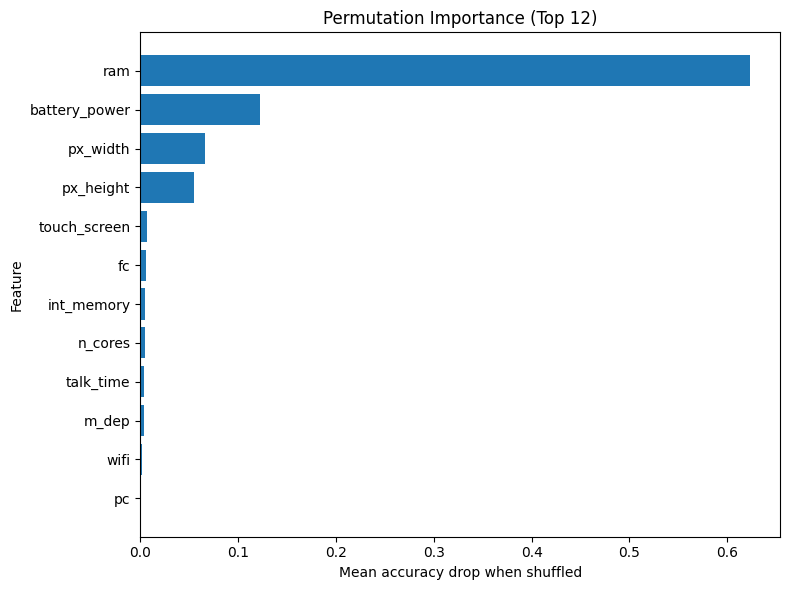

In [14]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

perm = permutation_importance(
    rf_model, X_test, y_test, n_repeats=10, random_state=42, scoring="accuracy"
)

perm_df = pd.DataFrame({
    "feature": feature_cols,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False).reset_index(drop=True)

print("Top‑15 by permutation importance:")
print(perm_df.head(15))

top_n = 12
plt.figure(figsize=(8, 6))
plt.barh(perm_df.head(top_n)["feature"][::-1], perm_df.head(top_n)["importance_mean"][::-1])
plt.xlabel("Mean accuracy drop when shuffled")
plt.ylabel("Feature")
plt.title("Permutation Importance (Top 12)")
plt.tight_layout()
plt.show()

## 3) Extract the Top‑15 feature list (for your report)

In [15]:
TOP15 = perm_df.head(15)["feature"].tolist()
print("TOP‑15 features:", TOP15)

TOP‑15 features: ['ram', 'battery_power', 'px_width', 'px_height', 'touch_screen', 'fc', 'int_memory', 'n_cores', 'talk_time', 'm_dep', 'wifi', 'pc', 'mobile_wt', 'sc_h', 'three_g']
